In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

dataset = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,magazines,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


# 1 - visualization
<b>we will take the 1st column for the visualization because it has the most rows</b>

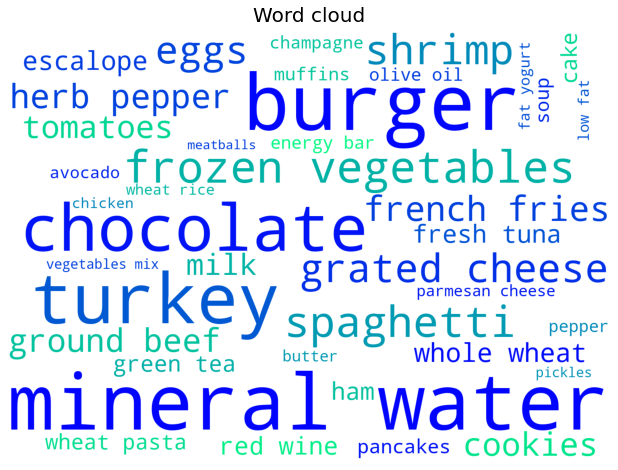

In [3]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='white',max_words = 40,width=1500,height=1080,colormap="winter").generate(" ".join(dataset[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word cloud", fontsize = 20)
plt.show()

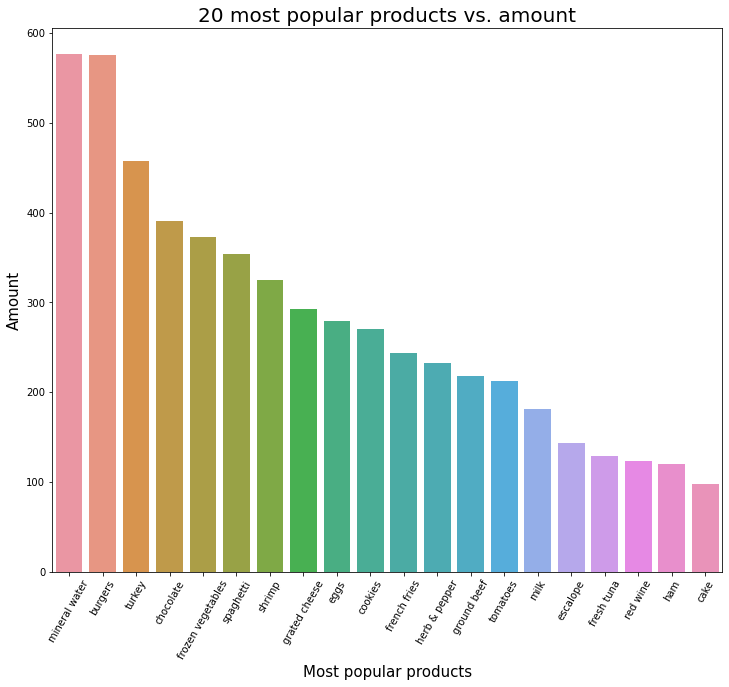

In [4]:
products = pd.DataFrame(dataset[0].value_counts())
best_20_product = pd.DataFrame(dataset[0].value_counts()).head(20)

plt.figure(figsize=(12,10))

sns.barplot(best_20_product.index,best_20_product[0])

plt.title('20 most popular products vs. amount', fontsize = 20)
plt.xlabel('Most popular products', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

plt.xticks(rotation = '60')
plt.show()

# 2 - Preprocessing

In [5]:
dataset.fillna('',axis=1,inplace=True)

In [6]:
data_list = dataset.to_numpy().tolist()

In [7]:
te = TransactionEncoder()
te_array = te.fit(data_list).transform(data_list)
te_array

array([[False, False,  True, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True, False]])

In [8]:
df = pd.DataFrame(te_array,columns=te.columns_)
df.drop(columns=[''],axis=1,inplace=True)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3 - Apriori

In [9]:
frequent_itemsets=apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(ground beef, mineral water, spaghetti)"
254,0.015731,"(milk, mineral water, spaghetti)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


In [10]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.39)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198
1,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
4,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
5,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
6,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
7,"(eggs, chocolate)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
8,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
9,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656


In [14]:
association_rules(frequent_itemsets,metric="lift",min_threshold=2.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268
1,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825
2,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381
3,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930
4,(grated cheese),(ground beef),0.052393,0.098254,0.011332,0.216285,2.201294,0.006184,1.150605
5,(ground beef),(grated cheese),0.098254,0.052393,0.011332,0.115332,2.201294,0.006184,1.071145
6,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
7,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
8,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066
9,(olive oil),(ground beef),0.065858,0.098254,0.014131,0.214575,2.183889,0.007661,1.148100


<b>what we get, as a result, staples like water, pasta, beef and vegetables are more often bought together.<br>
In order for us to develop a strategy that works, it will be better to put these store shelves side by side.</b>